In [1]:
%load_ext autoreload
%autoreload 2
from train import train_till_convergence

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

In [3]:
# Default hyperparameters
d = 400
n = 200
m = 64
corruption_rate = 0.1
gamma = 0.1

100%|██████████| 11/11 [03:59<00:00, 21.74s/it]


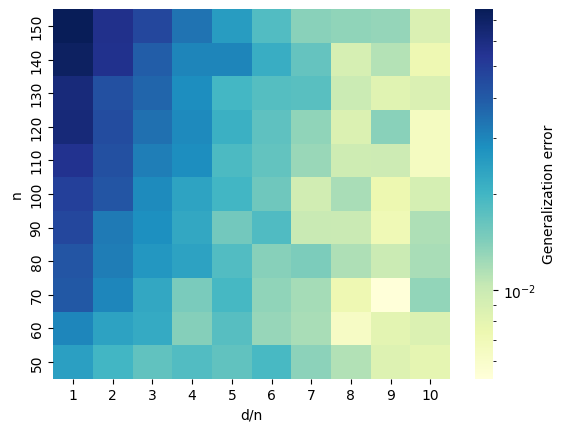

In [25]:
# Generate heatmaps
from matplotlib.colors import LogNorm

n_values = []
d_over_n_values = []
generalization_error_values = []
for n in tqdm(np.arange(50, 160, 10)):
    for d_over_n in np.arange(1, 11, 1):
        d = n * d_over_n
        total_generalization_error = 0
        for i in range(20):
            _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, 1/n, verbosity=-1)
            total_generalization_error += generalization_error_sample
        generalization_error = total_generalization_error / 20
        n_values.append(n)
        d_over_n_values.append(d_over_n)
        generalization_error_values.append(generalization_error)
df = pd.DataFrame({"n": n_values, "d/n": d_over_n_values, "generalization_error": generalization_error_values})
table = df.pivot(index="n", columns="d/n", values="generalization_error")

ax = sns.heatmap(table, norm=LogNorm(vmin=10e-3*1.2,vmax=10e-2*1.2), cmap="YlGnBu", cbar_kws={"label": "Generalization error"})
ax.invert_yaxis()

plt.show()

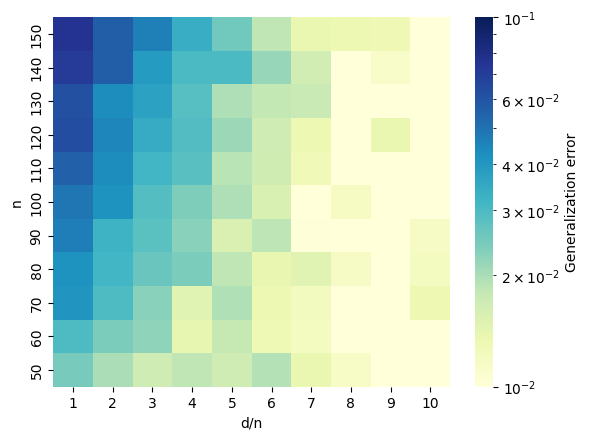

In [51]:
df = pd.DataFrame({"n": n_values, "d/n": d_over_n_values, "generalization_error": generalization_error_values})

table = df.pivot(index="n", columns="d/n", values="generalization_error")

ax = sns.heatmap(table, norm=LogNorm(vmin=1e-2,vmax=1e-1), cmap="YlGnBu", cbar_kws={"label": "Generalization error"})
ax.invert_yaxis()
plt.show()
df.to_csv("d_over_n_heatmap.csv")

In [52]:
# Generate heatmaps
from matplotlib.colors import LogNorm

n_values = []
inverse_gamma_values = []
generalization_error_values = []
for n in tqdm(np.arange(50, 160, 10)):
    for inverse_gamma in np.arange(50, 160, 10):
        gamma = 1 / inverse_gamma
        d = n * 2
        total_generalization_error = 0
        for i in range(20):
            _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, gamma, verbosity=-1)
            total_generalization_error += generalization_error_sample
        generalization_error = total_generalization_error / 20
        n_values.append(n)
        inverse_gamma_values.append(inverse_gamma)
        generalization_error_values.append(generalization_error)
df = pd.DataFrame({"n": n_values, "1/gamma": inverse_gamma_values, "generalization_error": generalization_error_values})
table = df.pivot(index="n", columns="1/gamma", values="generalization_error")

ax = sns.heatmap(table, norm=LogNorm(), cmap="YlGnBu", cbar_kws={"label": "Generalization error"})
ax.invert_yaxis()

plt.show()

 91%|█████████ | 10/11 [15:12<01:31, 91.25s/it] 


KeyboardInterrupt: 

  6%|▌         | 1/18 [00:00<00:11,  1.54it/s]

10 0.0004000008106231689


 17%|█▋        | 3/18 [00:02<00:13,  1.11it/s]

15 0.0008000016212463378
20 0.0011999964714050292


 22%|██▏       | 4/18 [00:03<00:08,  1.66it/s]

25 0.0013999998569488525


 28%|██▊       | 5/18 [00:06<00:22,  1.77s/it]

30 0.0006999969482421875


 33%|███▎      | 6/18 [00:09<00:25,  2.13s/it]

35 0.001799994707107544


 39%|███▉      | 7/18 [00:13<00:28,  2.63s/it]

40 0.0006999969482421875


 44%|████▍     | 8/18 [00:21<00:44,  4.43s/it]

45 0.0005999922752380372


 50%|█████     | 9/18 [00:27<00:42,  4.73s/it]

50 0.0010999977588653565


 56%|█████▌    | 10/18 [00:36<00:50,  6.27s/it]

55 0.0016000032424926757


 61%|██████    | 11/18 [00:43<00:44,  6.42s/it]

60 0.0010999977588653565


 67%|██████▋   | 12/18 [01:04<01:04, 10.79s/it]

65 0.0004999935626983643


 72%|███████▏  | 13/18 [01:20<01:01, 12.30s/it]

70 0.0013999879360198975


 78%|███████▊  | 14/18 [01:35<00:53, 13.34s/it]

75 0.0018000006675720215


 83%|████████▎ | 15/18 [01:54<00:44, 14.96s/it]

80 0.0025999963283538817


 89%|████████▉ | 16/18 [02:24<00:39, 19.52s/it]

85 0.0019999980926513673


 94%|█████████▍| 17/18 [02:58<00:23, 23.87s/it]

90 0.0006999909877777099


100%|██████████| 18/18 [03:29<00:00, 11.65s/it]

95 0.001799994707107544


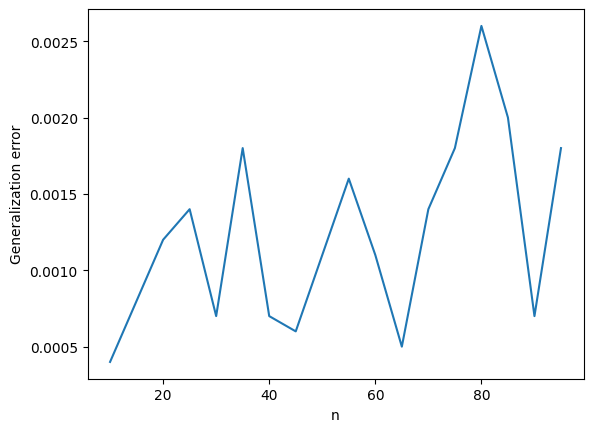

In [15]:
generalization_error_values = []
n_range = np.arange(5, 105, 5)

for n in tqdm(n_range):
    d = 2 * n
    gamma = 4 / (n)
    total_generalization_error = 0
    for i in range(10):
        _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, gamma, verbosity=-1)
        total_generalization_error += generalization_error_sample
    generalization_error = total_generalization_error / 10
    generalization_error_values.append(generalization_error)
    print(n, generalization_error)
plt.plot(n_range, generalization_error_values)
plt.xlabel("n")
plt.ylabel("Generalization error")
plt.show()

In [11]:
for i in range(1):
    print(train_till_convergence(d, n, m, corruption_rate, gamma, verbosity=-1))

Epoch 1, Train error: 0.125, Generalization error: 0.0
Epoch 2, Train error: 0.125, Generalization error: 0.0
Epoch 3, Train error: 0.125, Generalization error: 0.0
Epoch 4, Train error: 0.125, Generalization error: 0.0
Epoch 5, Train error: 0.125, Generalization error: 0.0
Epoch 6, Train error: 0.125, Generalization error: 0.0
Epoch 7, Train error: 0.125, Generalization error: 0.0
Epoch 8, Train error: 0.125, Generalization error: 0.0
Epoch 9, Train error: 0.125, Generalization error: 0.0
Epoch 10, Train error: 0.125, Generalization error: 0.0
Epoch 11, Train error: 0.125, Generalization error: 0.0
Epoch 12, Train error: 0.125, Generalization error: 0.0
Epoch 13, Train error: 0.125, Generalization error: 0.0
Epoch 14, Train error: 0.125, Generalization error: 0.0
Epoch 15, Train error: 0.125, Generalization error: 0.0
Epoch 16, Train error: 0.125, Generalization error: 0.0
Epoch 17, Train error: 0.125, Generalization error: 0.0
Epoch 18, Train error: 0.125, Generalization error: 0.0
E